In [1]:
pip install geopandas plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.animation as animation
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import geopandas as gpd
import plotly
import plotly.express as px

In [3]:
#load data
zillow_df = pd.read_csv('zillow_df.csv')

In [4]:
zillow_df.head()

pop_rank   city state  month  year  mean_sales_price  number_of_sales  \
0        83  Akron    OH      2  2008         111182.75            398.0   
1        83  Akron    OH      3  2008         117496.40            403.0   
2        83  Akron    OH      4  2008         116325.50            480.0   
3        83  Akron    OH      5  2008         140846.00            478.0   
4        83  Akron    OH      6  2008         137244.50            603.0   

      home_value  market_heat_index  value_surplus  
0  124307.869610                NaN  -13125.119610  
1  124112.725495                NaN   -6616.325495  
2  124067.896104                NaN   -7742.396104  
3  124246.821831                NaN   16599.178169  
4  124224.500972                NaN   13019.999028

In [5]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30396 entries, 0 to 30395
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pop_rank           30396 non-null  int64  
 1   city               30396 non-null  object 
 2   state              30396 non-null  object 
 3   month              30396 non-null  int64  
 4   year               30396 non-null  int64  
 5   mean_sales_price   30396 non-null  float64
 6   number_of_sales    18554 non-null  float64
 7   home_value         30396 non-null  float64
 8   market_heat_index  12665 non-null  float64
 9   value_surplus      30396 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 2.3+ MB


In [6]:
zillow_df.describe().round(2)

pop_rank     month      year  mean_sales_price  number_of_sales  \
count  30396.00  30396.00  30396.00          30396.00         18554.00   
mean      82.61      6.50   2016.08         314577.05          2491.33   
std       54.85      3.45      4.91         241442.62          2660.49   
min        1.00      1.00   2008.00          67682.00            39.00   
25%       39.00      3.75   2012.00         176356.84           834.00   
50%       77.00      6.50   2016.00         242918.75          1456.00   
75%      117.00      9.25   2020.00         369571.48          3072.75   
max      284.00     12.00   2025.00        2100471.50         23983.00   

       home_value  market_heat_index  value_surplus  
count    30396.00           12665.00       30396.00  
mean    247381.70              63.15       67195.35  
std     159793.77              19.42      152987.53  
min      44533.95              10.00     -487232.57  
25%     147137.88              50.00       15610.51  
50%     199216.04              60.00       33997.87  
75%     287181.98              74.00       64478.86  
max    1744103.89             235.00     1685635.03

In [7]:
#create variable for features
stats_cat = ['mean_sales_price', 'number_of_sales', 'home_value', 'market_heat_index', 'value_surplus']

In [8]:
def mean_func(col, *args):
    """get mean values for feature categories"""
    return zillow_df.groupby([col, *args]
                 )[stats_cat].mean(
                ).sort_values('mean_sales_price', ascending=False
                ).round(2)

def median_func(col, *args):
    """get median values for feature categories"""
    return zillow_df.groupby([col, *args]
                 )[stats_cat].median(
                ).sort_values('mean_sales_price', ascending=False
                ).round(2)

In [9]:
#analyze data by state
state_means = mean_func('state', 'year')
state_means = state_means.reset_index()
state_means

state  year  mean_sales_price  number_of_sales  home_value  \
0      NM  2023        1165768.55           718.50   422896.83   
1      NM  2022        1155846.99           936.67   410566.05   
2      NM  2021        1135407.17          1208.25   361292.58   
3      NM  2024        1125365.32           730.58   438650.14   
4      HI  2025        1123507.00           561.00  1046223.07   
..    ...   ...               ...              ...         ...   
733    MI  2008         108917.44          3225.95   114913.46   
734    MI  2012         107678.58          3683.83    86798.28   
735    MI  2010         100665.20          3168.00    92004.17   
736    MI  2011          99921.90          3266.08    85282.66   
737    MI  2009          94603.93          3386.00    99814.39   

     market_heat_index  value_surplus  
0                61.25      742871.72  
1                69.42      745280.95  
2                74.33      774114.59  
3                54.08      686715.18  
4                62.00       77283.93  
..                 ...            ...  
733                NaN       -5996.02  
734                NaN       20880.29  
735                NaN        8661.03  
736                NaN       14639.24  
737                NaN       -5210.46  

[738 rows x 7 columns]

In [10]:
#analyze median by state
state_medians = median_func('state', 'year')
state_medians = state_medians.reset_index()
state_medians

state  year  mean_sales_price  number_of_sales  home_value  \
0      NM  2023        1177105.20            722.0   422005.98   
1      NM  2022        1165572.62            985.0   400258.90   
2      NM  2021        1147506.88           1213.5   352514.65   
3      NM  2020        1125449.00           1195.0   309930.35   
4      HI  2025        1123507.00            561.0  1046223.07   
..    ...   ...               ...              ...         ...   
733    OH  2009         107022.65           1132.0   118396.20   
734    MI  2012         105831.00           3128.5    90566.41   
735    MI  2010         103038.62           2817.0    93338.43   
736    MI  2011         100476.50           2793.5    88898.34   
737    MI  2009          97773.80           2887.0   103694.24   

     market_heat_index  value_surplus  
0                 62.5      748795.10  
1                 65.5      746149.30  
2                 74.0      769537.93  
3                 64.5      797118.95  
4                 62.0       77283.93  
..                 ...            ...  
733                NaN       -3528.02  
734                NaN       19301.22  
735                NaN       10714.58  
736                NaN       13643.42  
737                NaN       -6010.73  

[738 rows x 7 columns]

In [11]:
#difference in means/medians
diff_state_mean_median = (state_means[stats_cat] - state_medians[stats_cat])
diff_state_mean_median.sort_values('mean_sales_price', ascending=False)

mean_sales_price  number_of_sales  home_value  market_heat_index  \
21         196342.38           345.83   103872.12              18.25   
26         118169.84          1034.86   -49262.59                NaN   
22         115803.82          1113.67   -52356.73              18.08   
23         106501.17           703.40   111089.46                NaN   
25         103449.35         -1353.00   304565.57              10.83   
..               ...              ...         ...                ...   
18          -6320.84           234.67     -807.14                NaN   
15          -6415.69           116.75     9246.59                NaN   
1           -9725.63           -48.33    10307.15               3.92   
0          -11336.65            -3.50      890.85              -1.25   
2          -12099.71            -5.25     8777.93               0.33   

    value_surplus  
21       91746.99  
26      163949.70  
22      167813.39  
23      -11250.45  
25     -201116.22  
..            ...  
18        2281.94  
15       -9618.60  
1         -868.35  
0        -5923.38  
2         4576.66  

[738 rows x 5 columns]

Median will be better to use as there is a significant difference in most states between mean and median, showing outliers skewed mean

In [13]:
#count per state
zillow_df['state'].value_counts()

state
CA    2856
FL    2856
TX    1836
NC    1836
PA    1632
OH    1428
NY    1020
AL    1020
TN    1020
SC     816
MI     816
GA     816
LA     816
CO     816
MA     816
IN     612
CT     612
VA     612
MO     612
OR     612
IL     612
MD     408
NM     408
MS     408
AR     408
WA     408
AZ     408
KY     408
NV     408
OK     408
WI     408
UT     408
ID     204
IA     204
MN     204
NE     204
RI     204
ME     204
DE     204
HI     204
KS     204
Name: count, dtype: int64

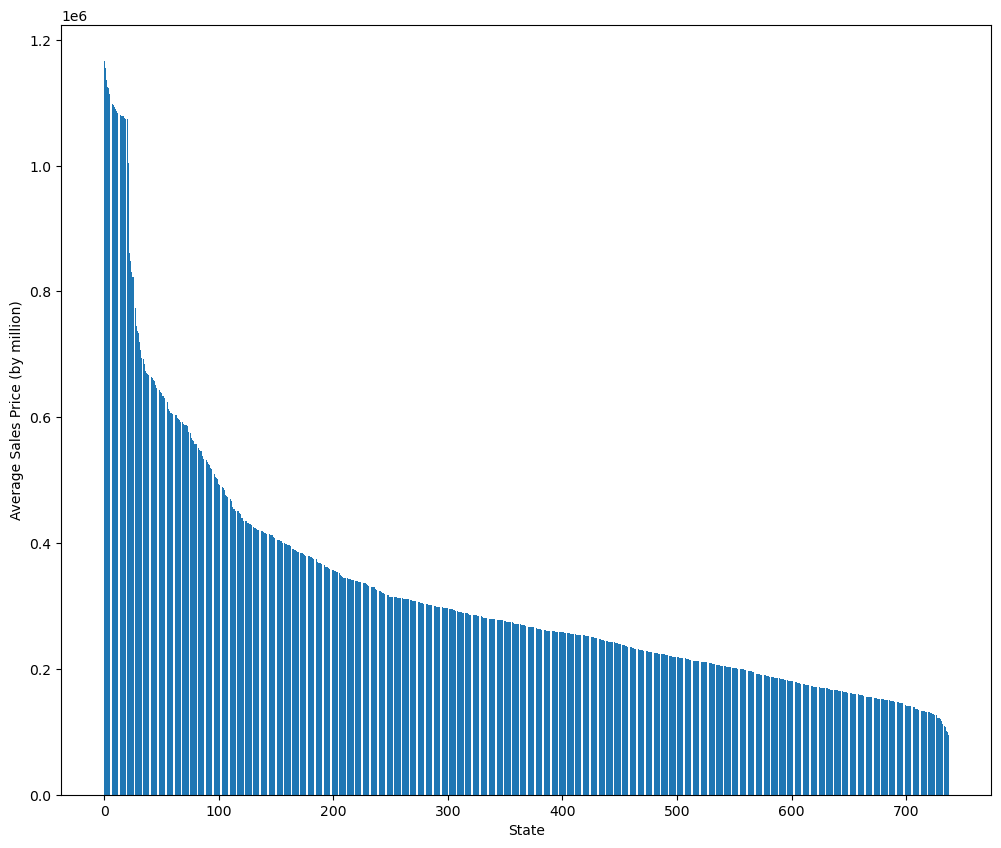

In [14]:
#plot data by state means
fig, ax = plt.subplots(figsize=(12, 10))
plt.bar(state_means.index, state_means.mean_sales_price)
plt.xlabel('State')
plt.ylabel('Average Sales Price (by million)')
plt.show()

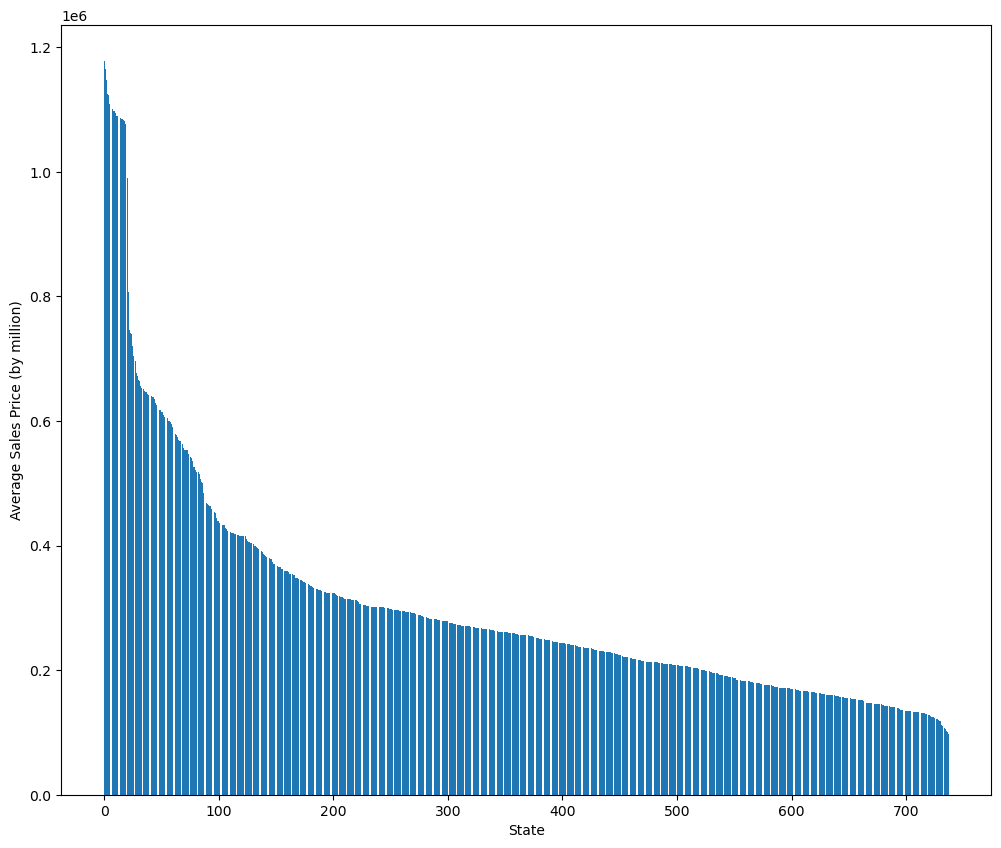

In [15]:
#plot data by state median price
fig, ax = plt.subplots(figsize=(12, 10))
plt.bar(state_medians.index, state_medians.mean_sales_price)
plt.xlabel('State')
plt.ylabel('Average Sales Price (by million)')
plt.show()

In [16]:
#analyze data by year
year_mean = mean_func('year')
year_mean = year_mean.sort_values('year', ascending=False)
year_mean

mean_sales_price  number_of_sales  home_value  market_heat_index  \
year                                                                     
2025         461453.20          1546.84   390176.11              55.32   
2024         471524.20          2095.93   385175.62              58.27   
2023         444243.67          2099.49   370575.61              64.52   
2022         435133.90          2777.36   365309.04              69.72   
2021         399878.73          3469.23   318275.95              79.26   
2020         351291.47          2917.91   274795.33              69.79   
2019         321000.64          2797.03   259495.09              52.47   
2018         313789.93          2825.75   249265.40              48.68   
2017         299376.37          2919.69   233382.98                NaN   
2016         283571.85          2846.84   220422.74                NaN   
2015         273649.80          2716.98   207316.75                NaN   
2014         264182.86          2474.89   196111.03                NaN   
2013         253063.29          2515.08   183036.38                NaN   
2012         238545.08          2211.85   170970.00                NaN   
2011         234241.17          1949.22   173307.54                NaN   
2010         241049.29          1917.48   182964.42                NaN   
2009         238739.65          1959.54   188883.95                NaN   
2008         268443.87          1884.51   211294.20                NaN   

      value_surplus  
year                 
2025       71277.09  
2024       86348.57  
2023       73668.06  
2022       69824.86  
2021       81602.79  
2020       76496.13  
2019       61505.55  
2018       64524.53  
2017       65993.39  
2016       63149.11  
2015       66333.05  
2014       68071.82  
2013       70026.91  
2012       67575.08  
2011       60933.63  
2010       58084.87  
2009       49855.70  
2008       57149.67

In [17]:
#analyze data by year
year_median = median_func('year')
year_median = year_median.sort_values('year', ascending=False)
year_median

mean_sales_price  number_of_sales  home_value  market_heat_index  \
year                                                                     
2025         381537.00            956.0   341868.19               53.0   
2024         392293.22           1295.5   337378.46               56.0   
2023         365786.00           1278.5   320301.59               62.0   
2022         353558.38           1667.0   305432.49               67.0   
2021         323481.75           2053.0   267331.26               76.0   
2020         279424.10           1807.0   234449.61               68.0   
2019         256324.50           1682.0   222112.64               53.0   
2018         246464.28           1673.0   211126.36               48.0   
2017         233300.38           1693.0   198495.61                NaN   
2016         223637.45           1671.5   184531.64                NaN   
2015         214689.00           1616.0   173202.31                NaN   
2014         204525.25           1501.5   165083.20                NaN   
2013         195221.50           1484.0   155868.65                NaN   
2012         182471.88           1285.5   145181.13                NaN   
2011         179511.80           1078.5   146132.45                NaN   
2010         186409.75           1033.0   154638.89                NaN   
2009         184674.50           1097.0   168041.69                NaN   
2008         213006.50           1101.0   187827.38                NaN   

      value_surplus  
year                 
2025       54304.62  
2024       58876.35  
2023       49452.70  
2022       46542.68  
2021       53106.13  
2020       45364.68  
2019       33792.14  
2018       33921.29  
2017       33339.92  
2016       31876.84  
2015       31782.49  
2014       31075.58  
2013       32593.13  
2012       30847.49  
2011       23049.57  
2010       19783.97  
2009       11191.13  
2008       14430.19

In [18]:
zillow_df['year'].value_counts()

year
2009    1788
2010    1788
2018    1788
2011    1788
2012    1788
2013    1788
2014    1788
2015    1788
2016    1788
2017    1788
2022    1788
2019    1788
2020    1788
2021    1788
2024    1788
2023    1788
2008    1639
2025     149
Name: count, dtype: int64

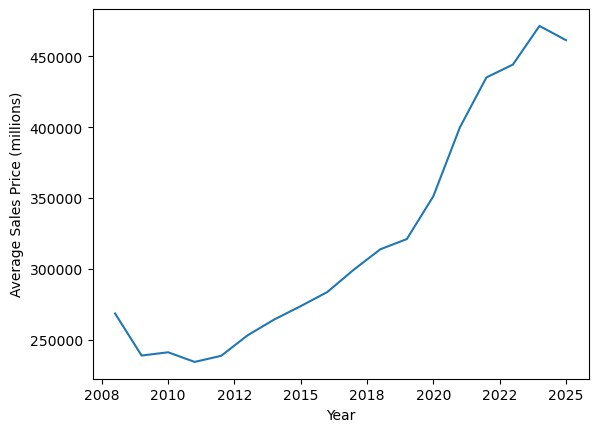

In [19]:
#lineplot of year mean data
fig, ax = plt.subplots()
plt.plot(year_mean.index, year_mean.mean_sales_price)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('Year')
plt.ylabel('Average Sales Price (millions)')
plt.show()

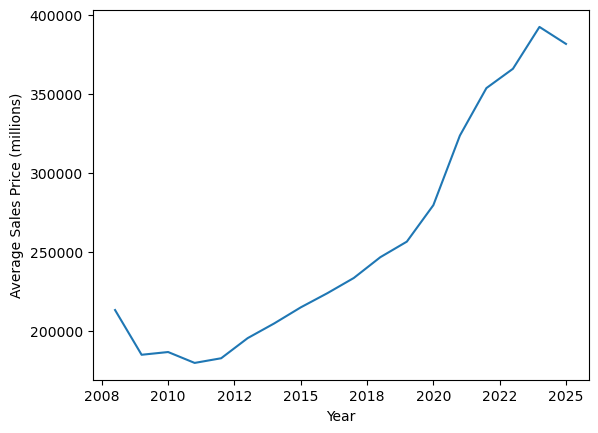

In [20]:
#lineplot of year median data
fig, ax = plt.subplots()
plt.plot(year_median.index, year_median.mean_sales_price)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('Year')
plt.ylabel('Average Sales Price (millions)')
plt.show()

In [21]:
#analyze monthly data
month_mean = mean_func('month')
month_mean = month_mean.sort_values('month')
month_mean

mean_sales_price  number_of_sales  home_value  market_heat_index  \
month                                                                     
1             307978.17          1811.62   251276.81              63.88   
2             296688.46          1855.16   242383.51              69.28   
3             305936.35          2440.66   243496.64              70.08   
4             312943.93          2539.88   244736.59              69.86   
5             320237.57          2794.96   245921.40              67.34   
6             327407.20          3040.92   246949.13              64.70   
7             325754.44          2886.73   247723.64              62.91   
8             322306.79          2877.34   248269.26              60.85   
9             316173.99          2553.26   248709.95              57.81   
10            314610.14          2531.00   249019.60              55.53   
11            312541.30          2235.78   249668.69              55.42   
12            312346.29          2330.36   250425.15              60.03   

       value_surplus  
month                 
1           56701.36  
2           54304.95  
3           62439.71  
4           68207.34  
5           74316.16  
6           80458.07  
7           78030.79  
8           74037.52  
9           67464.04  
10          65590.53  
11          62872.61  
12          61921.15

In [22]:
month_median = median_func('month')
month_median = month_median.sort_values('month')
month_median

mean_sales_price  number_of_sales  home_value  market_heat_index  \
month                                                                     
1             236346.25           1028.0   200798.65               59.0   
2             227136.25           1072.0   196437.24               65.0   
3             234247.40           1438.0   197116.06               67.0   
4             240038.20           1506.0   197940.29               69.0   
5             246756.20           1667.5   198300.44               66.0   
6             256630.75           1794.5   198948.42               64.0   
7             254454.75           1676.5   199592.44               61.0   
8             252880.60           1671.0   200123.20               59.0   
9             245413.50           1484.0   200527.53               56.0   
10            242493.60           1467.5   200587.82               54.0   
11            241452.50           1291.5   200933.51               53.0   
12            241465.40           1339.0   200627.03               56.0   

       value_surplus  
month                 
1           23680.95  
2           21172.60  
3           28024.00  
4           32308.31  
5           38779.99  
6           46372.51  
7           45173.13  
8           40348.26  
9           35081.01  
10          32518.03  
11          30518.71  
12          29743.84

In [23]:
zillow_df['month'].value_counts()

month
2     2533
3     2533
4     2533
5     2533
6     2533
7     2533
8     2533
9     2533
10    2533
11    2533
12    2533
1     2533
Name: count, dtype: int64

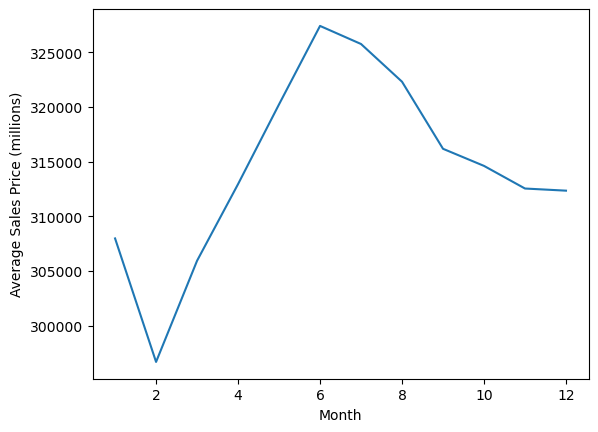

In [24]:
#lineplot of month mean data
plt.plot(month_mean.index, month_mean.mean_sales_price)
plt.xlabel('Month')
plt.ylabel('Average Sales Price (millions)')
plt.show()

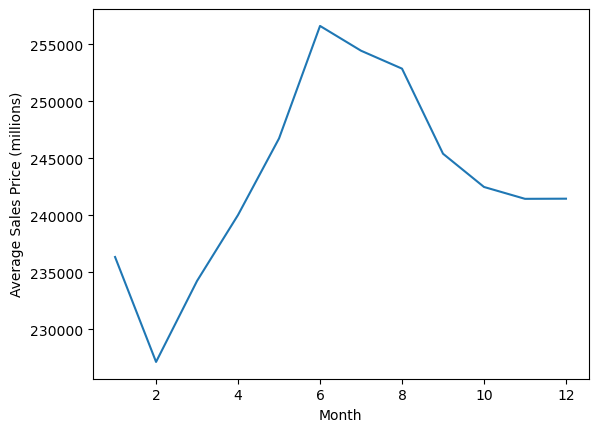

In [25]:
#lineplot of month median data
plt.plot(month_median.index, month_median.mean_sales_price)
plt.xlabel('Month')
plt.ylabel('Average Sales Price (millions)')
plt.show()

In [26]:
#create bins for population rank data
pr_bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, zillow_df['pop_rank'].max()]
pr_labels = ['25', '50', '75', '100', '125', '150', '175', '200', '225', '250', '300']

In [27]:
#sort by size rank
pop_rank_mean = mean_func('pop_rank')
pop_rank_mean['binned'] = pd.cut(pop_rank_mean.index, pr_bins, labels=pr_labels)
pop_rank_mean = pop_rank_mean.groupby(['binned']).mean().round(2).sort_values('binned')
pop_rank_mean

/var/folders/95/yr6zk14d0rb52tgyfy426wwh0000gn/T/ipykernel_20886/1742801620.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_rank_mean = pop_rank_mean.groupby(['binned']).mean().round(2).sort_values('binned')


mean_sales_price  number_of_sales  home_value  market_heat_index  \
binned                                                                     
25             402742.84          5654.05   333645.68              67.44   
50             305817.27          1933.96   256955.37              67.92   
75             304572.02           984.73   253353.87              65.17   
100            232826.01           877.57   206020.30              63.15   
125            267337.46              NaN   225933.42              60.75   
150            289072.73              NaN   180688.08              54.75   
175            224294.09           494.58   197055.08              59.02   
200            438156.52              NaN   258506.00              51.18   
225            443808.18              NaN   341840.46              56.74   
250            399632.05              NaN   256988.90              57.66   
300           1938947.26              NaN   361790.56              56.85   

        value_surplus  
binned                 
25           69097.17  
50           48861.91  
75           51218.16  
100          26805.71  
125          41404.04  
150         108384.65  
175          27239.02  
200         179650.52  
225         101967.72  
250         142643.15  
300        1577156.70

In [28]:
pop_rank_median = median_func('pop_rank')
pop_rank_median['binned'] = pd.cut(pop_rank_median.index, pr_bins, labels=pr_labels)
pop_rank_median = pop_rank_median.groupby(['binned']).mean().round(2).sort_values('binned')
pop_rank_median

/var/folders/95/yr6zk14d0rb52tgyfy426wwh0000gn/T/ipykernel_20886/2265002060.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_rank_median = pop_rank_median.groupby(['binned']).mean().round(2).sort_values('binned')


mean_sales_price  number_of_sales  home_value  market_heat_index  \
binned                                                                     
25             371239.55          5497.54   307611.04              65.52   
50             281014.37          1899.67   232839.26              66.29   
75             274826.71           960.04   231146.30              63.71   
100            208272.48           830.79   182110.37              61.45   
125            243487.66              NaN   205065.13              58.78   
150            282336.85              NaN   164772.87              52.44   
175            206364.58           488.00   180373.59              56.88   
200            370492.00              NaN   227148.94              49.00   
225            386825.86              NaN   299276.68              53.00   
250            401107.67              NaN   231133.22              55.67   
300           1949899.00              NaN   327217.83              55.00   

        value_surplus  
binned                 
25           65617.10  
50           47500.28  
75           44731.00  
100          24417.98  
125          39685.89  
150         122350.23  
175          20538.01  
200         147575.53  
225          83260.29  
250         178094.01  
300        1622681.17

In [29]:
pop_rank_mean.index.value_counts()

binned
25     1
50     1
75     1
100    1
125    1
150    1
175    1
200    1
225    1
250    1
300    1
Name: count, dtype: int64

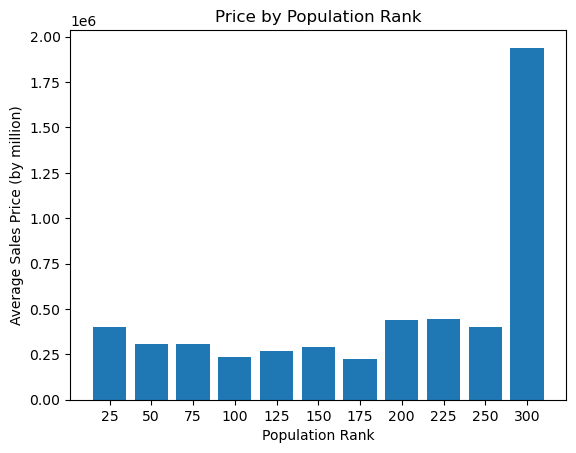

In [30]:
#chart for size rank by mean_sales_price
plt.bar(pop_rank_mean.index, pop_rank_mean.mean_sales_price)
plt.xlabel('Population Rank')
plt.ylabel('Average Sales Price (by million)')
plt.title('Price by Population Rank')
plt.show()

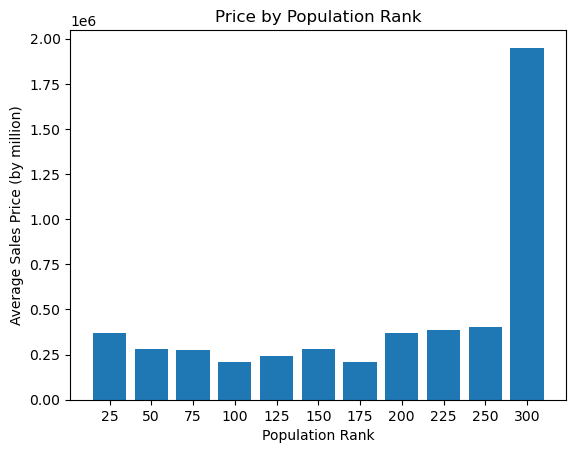

In [31]:
plt.bar(pop_rank_median.index, pop_rank_median.mean_sales_price)
plt.xlabel('Population Rank')
plt.ylabel('Average Sales Price (by million)')
plt.title('Price by Population Rank')
plt.show()

Distribution of data

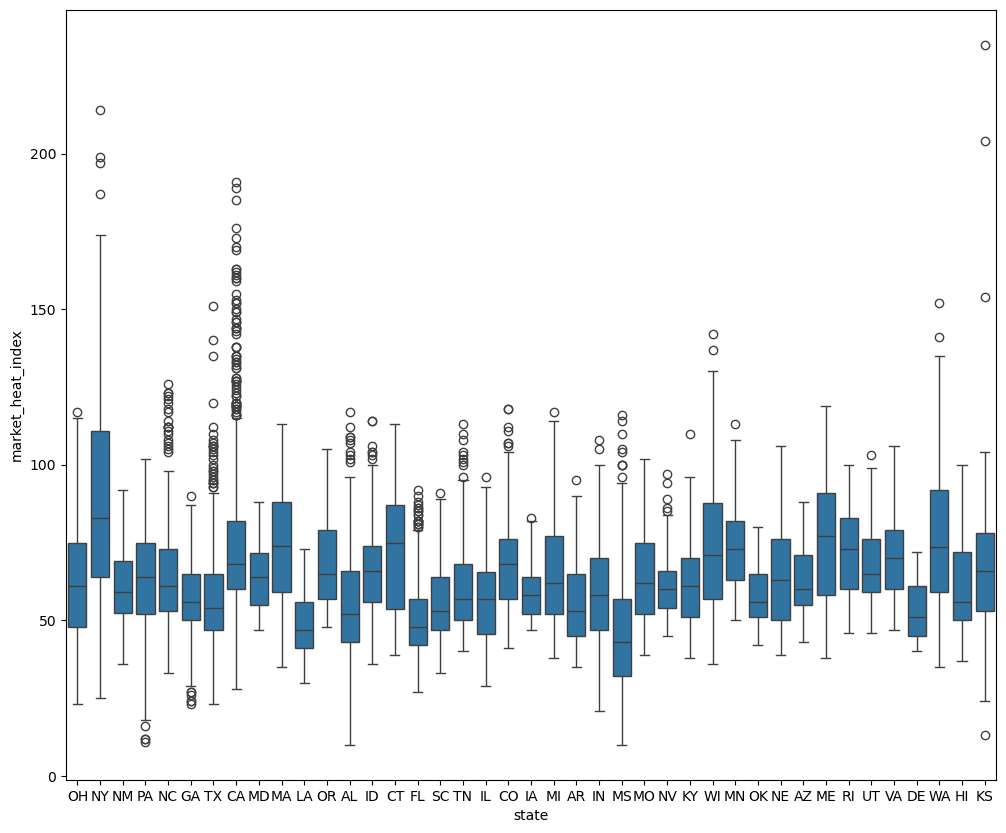

In [33]:
#distribution of data by state
for i in stats_cat:
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.boxplot(data=zillow_df, x='state', y=i)
    plt.show()

In [34]:
#ECDF function
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

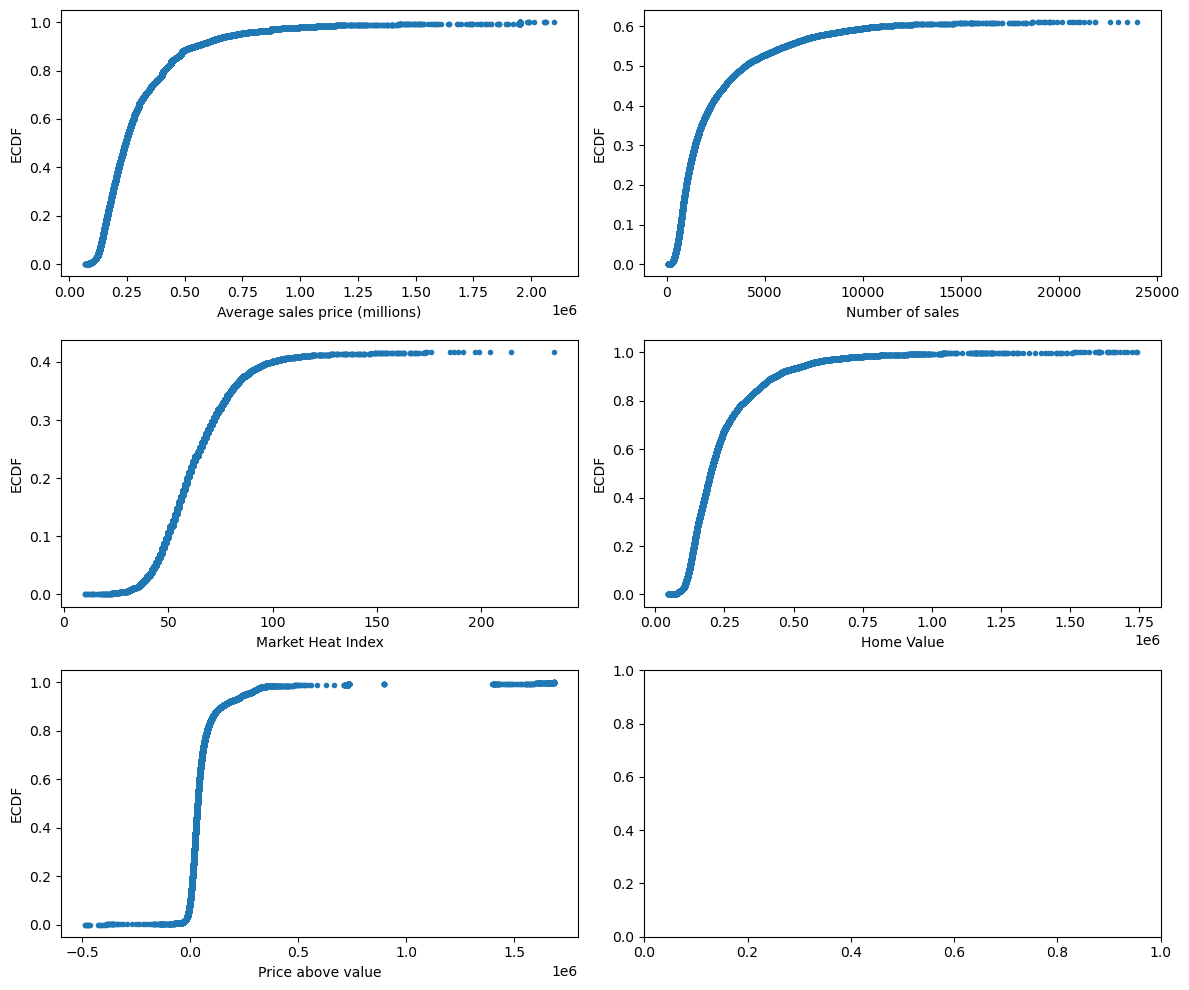

In [35]:
#ECDF distribtuion of numeric data
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
x, y = ecdf(zillow_df['mean_sales_price'])
ax[0, 0].plot(x, y, marker = '.', linestyle = 'none')
ax[0, 0].set_xlabel('Average sales price (millions)')
ax[0, 0].set_ylabel('ECDF')

x, y = ecdf(zillow_df['number_of_sales'])
ax[0, 1].plot(x, y, marker = '.', linestyle = 'none')
ax[0, 1].set_xlabel('Number of sales')
ax[0, 1].set_ylabel('ECDF')

x, y = ecdf(zillow_df['home_value'])
ax[1, 1].plot(x, y, marker = '.', linestyle = 'none')
ax[1, 1].set_xlabel('Home Value')
ax[1, 1].set_ylabel('ECDF')

x, y = ecdf(zillow_df['market_heat_index'])
ax[1, 0].plot(x, y, marker = '.', linestyle = 'none')
ax[1, 0].set_xlabel('Market Heat Index')
ax[1, 0].set_ylabel('ECDF')

x, y = ecdf(zillow_df['value_surplus'])
ax[2, 0].plot(x, y, marker = '.', linestyle = 'none')
ax[2, 0].set_xlabel('Price above value')
ax[2, 0].set_ylabel('ECDF')

plt.tight_layout()
plt.show()

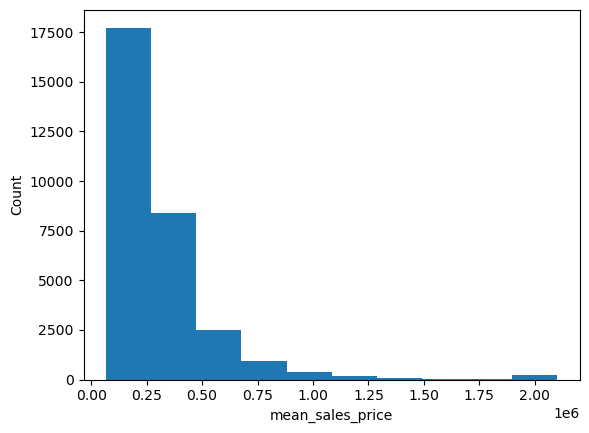

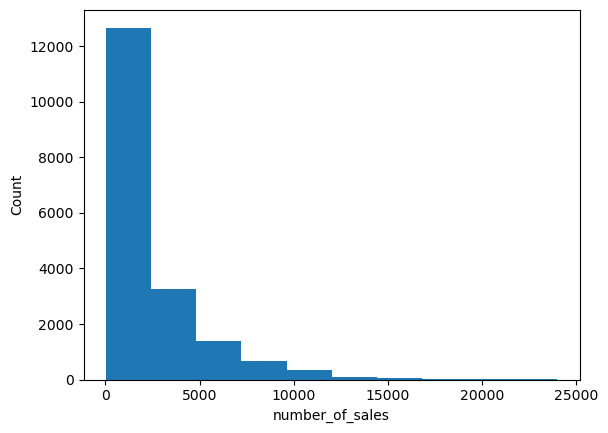

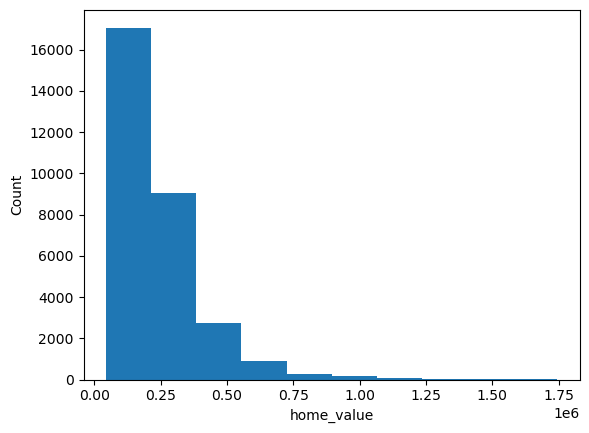

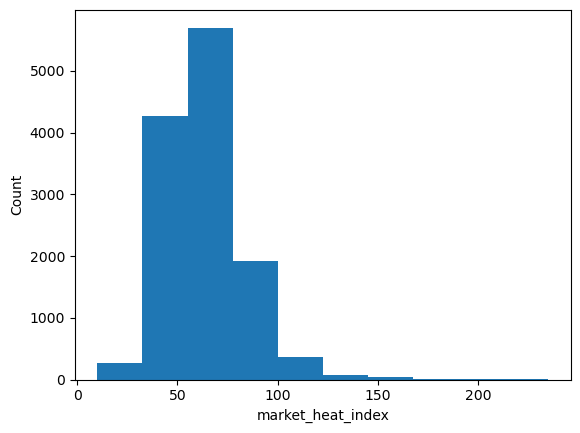

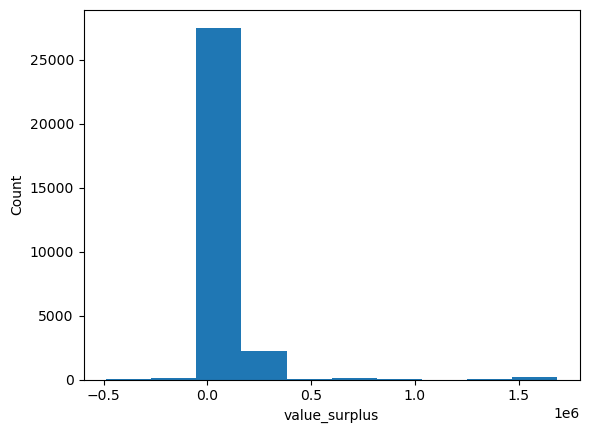

In [36]:
#histogram of data
for i in stats_cat:
    plt.hist(zillow_df[i], bins=10)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

Correlation

In [38]:
#non object/id columns for correlation 
numeric_data = zillow_df.drop(['city', 'state'], axis=1)

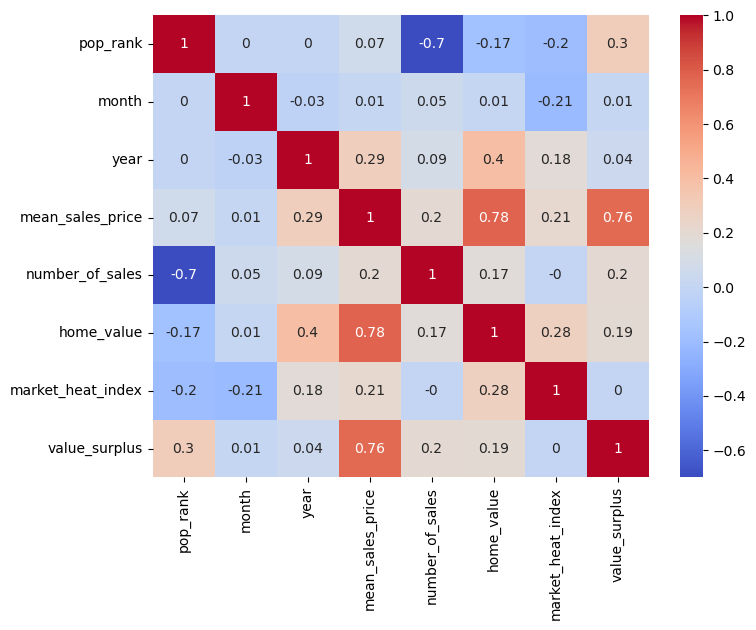

In [39]:
#correlation heatmap
corrmap = numeric_data.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(round(corrmap, 2), annot=True, cmap='coolwarm');

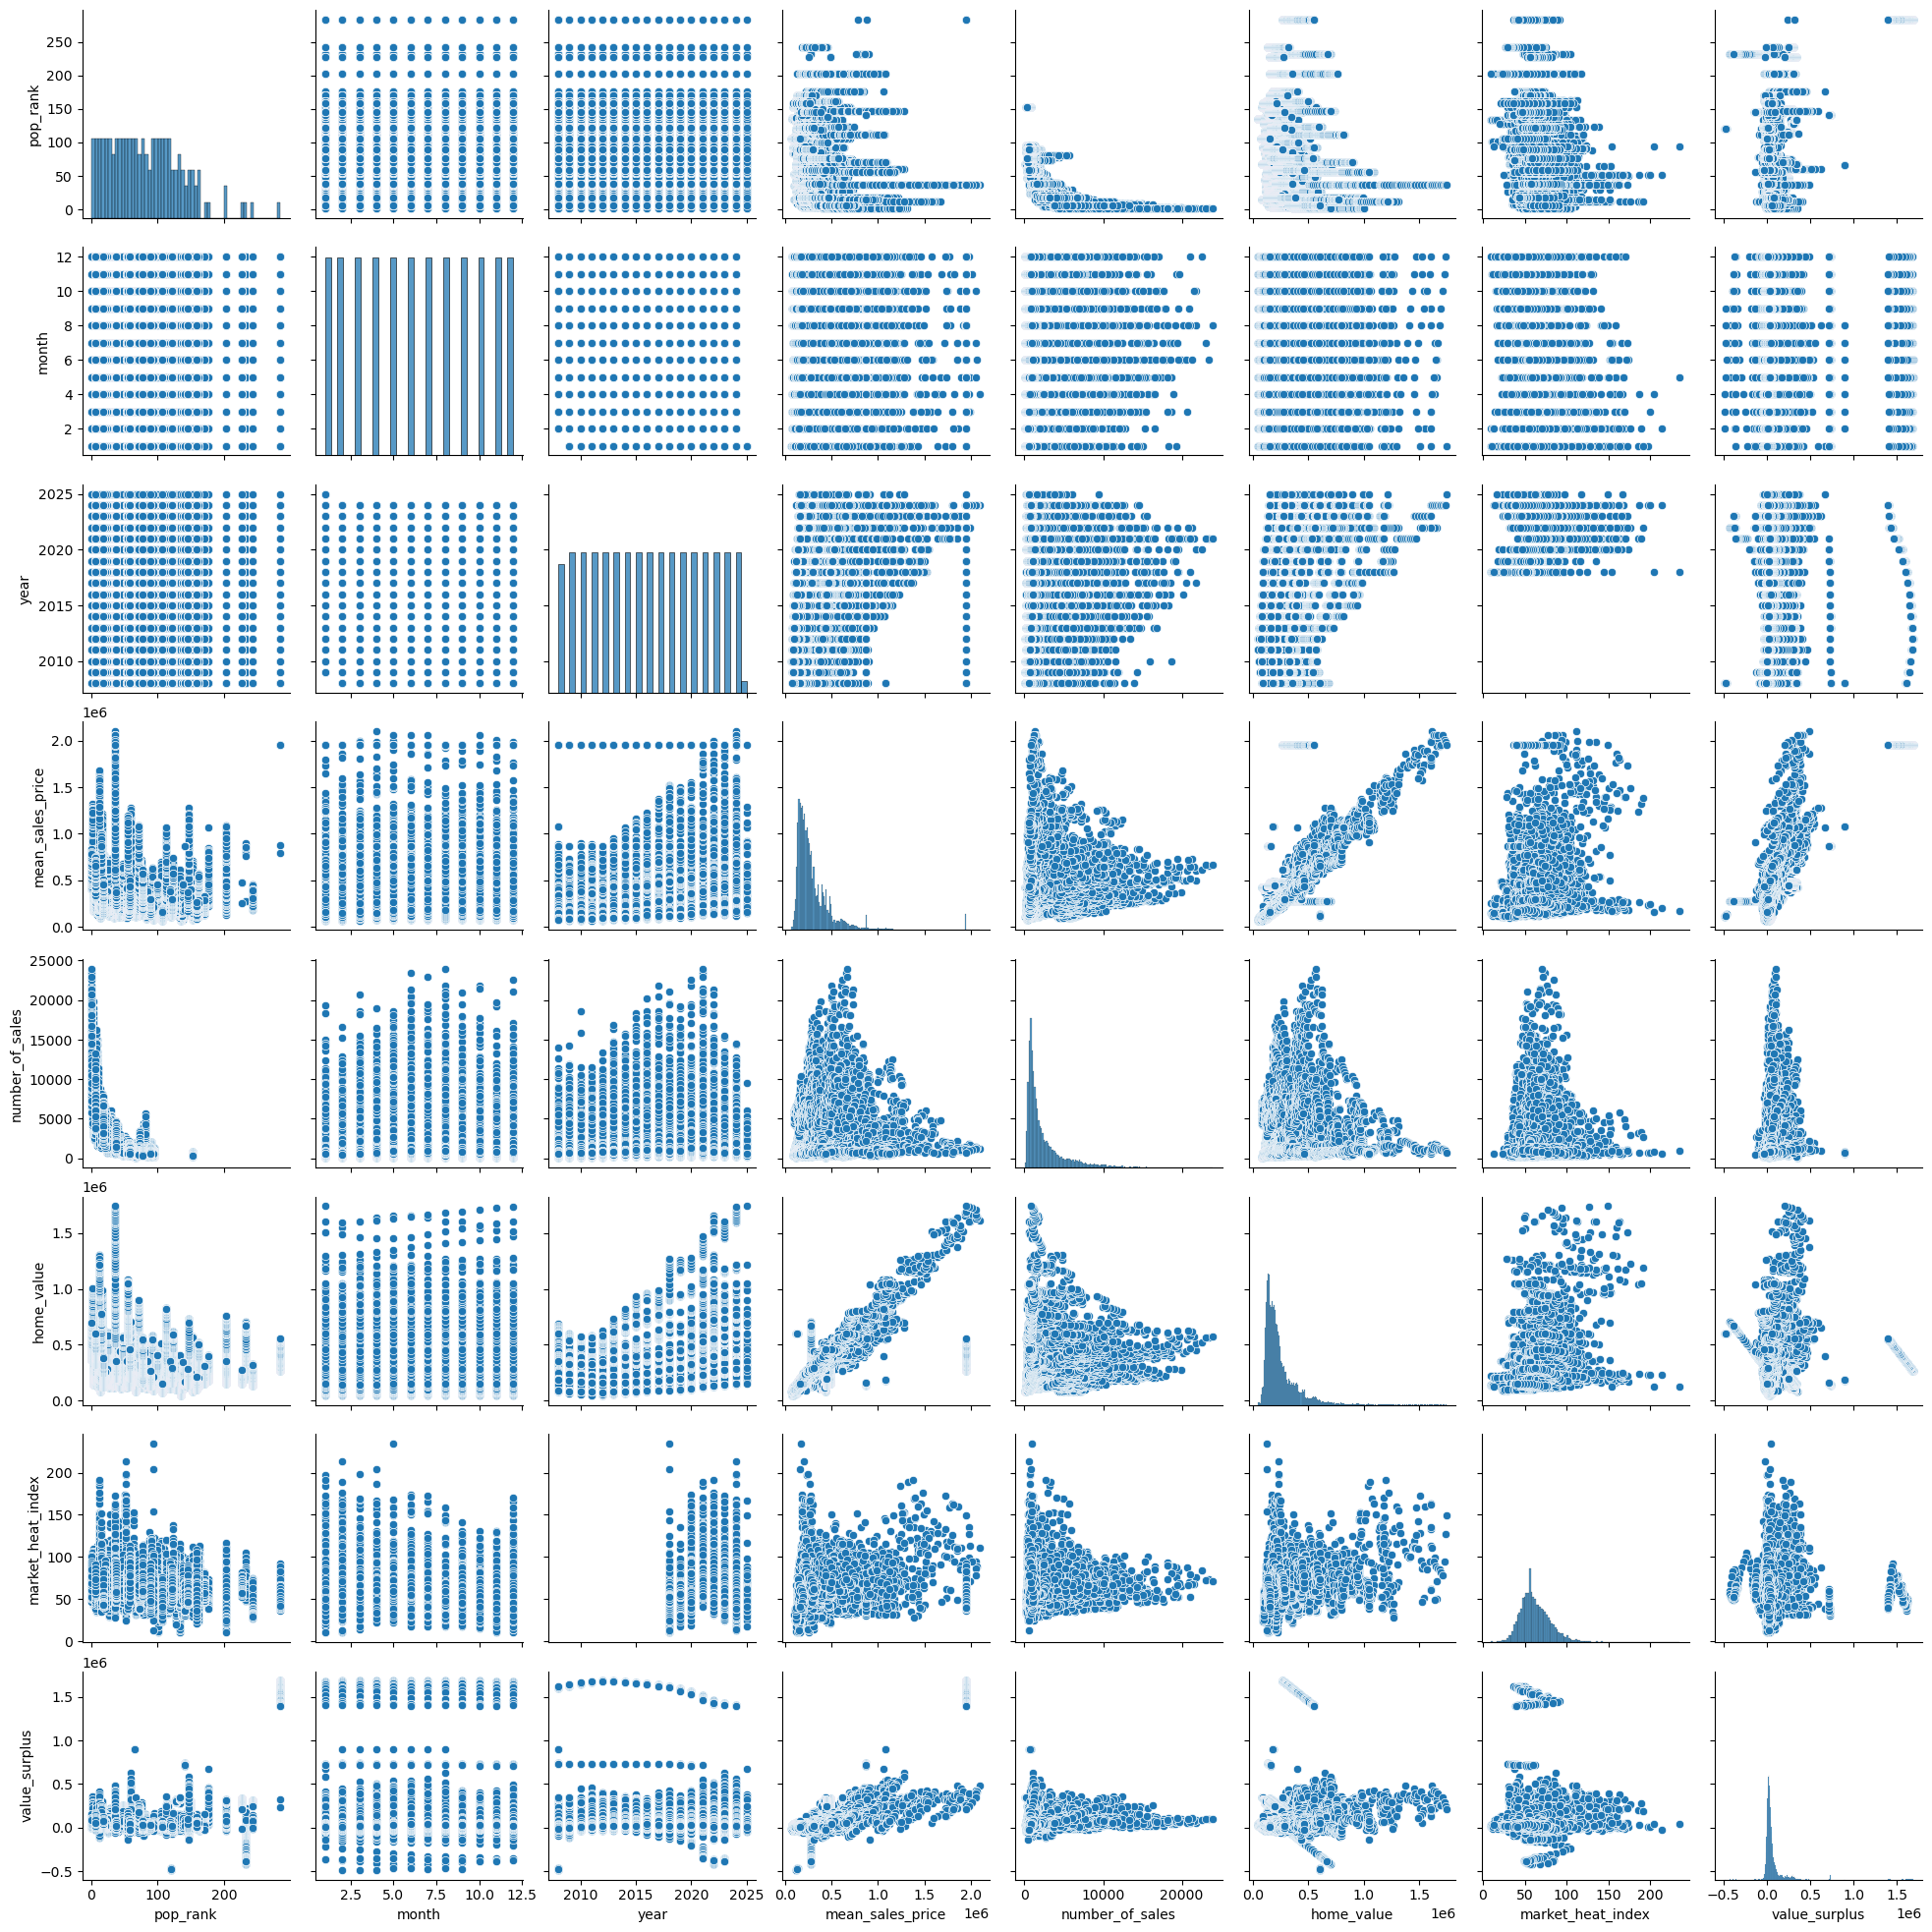

In [40]:
#plots of correlated data
sns.pairplot(numeric_data)
plt.show()

Multivariate plots

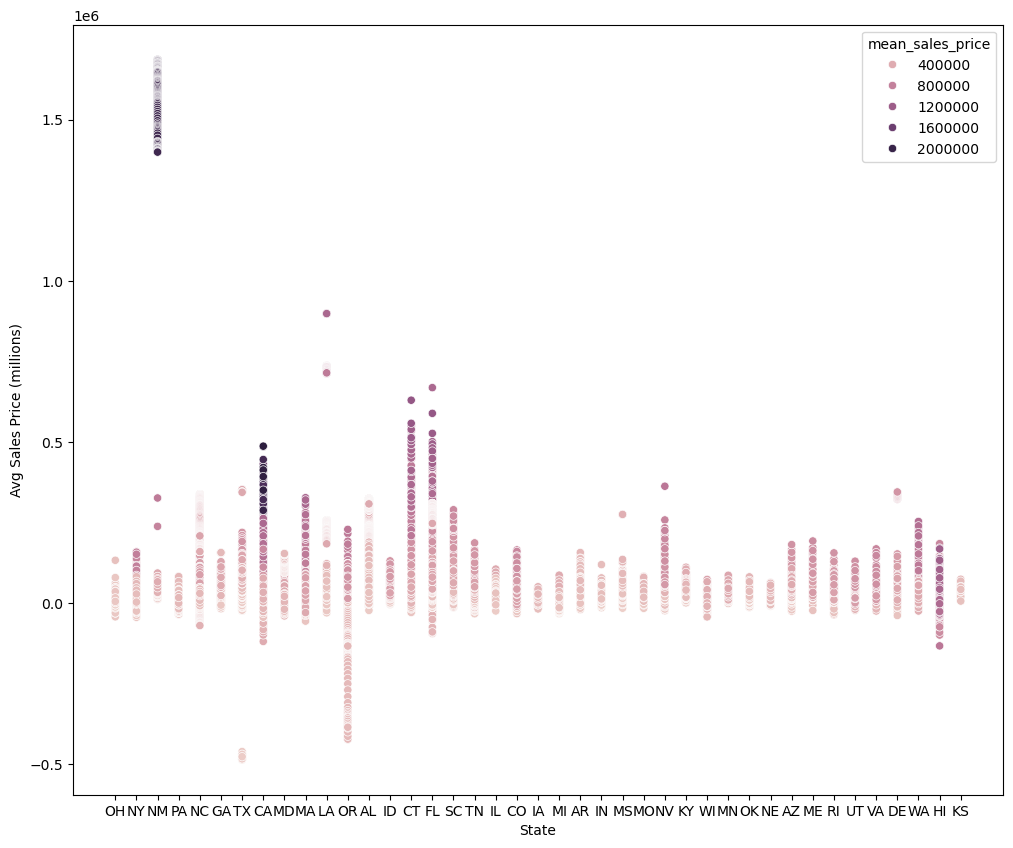

In [42]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(data = zillow_df, x='state', y='value_surplus', hue='mean_sales_price')
plt.xlabel('State')
plt.ylabel('Avg Sales Price (millions)')
plt.show()

In [43]:
#order state medians by year
state_medians = state_medians.sort_values('year')
state_medians.head()

state  year  mean_sales_price  number_of_sales  home_value  \
282    NV  2008         283794.95           2785.0   269065.82   
10     NM  2008        1093916.88            713.0   265897.76   
626    IA  2008         162085.75            751.0   152410.21   
572    TX  2008         178731.25           1343.0   146042.59   
460    ID  2008         218678.40            557.0   198535.97   

     market_heat_index  value_surplus  
282                NaN       15177.90  
10                 NaN      821025.32  
626                NaN        9748.74  
572                NaN       30858.66  
460                NaN       22338.72

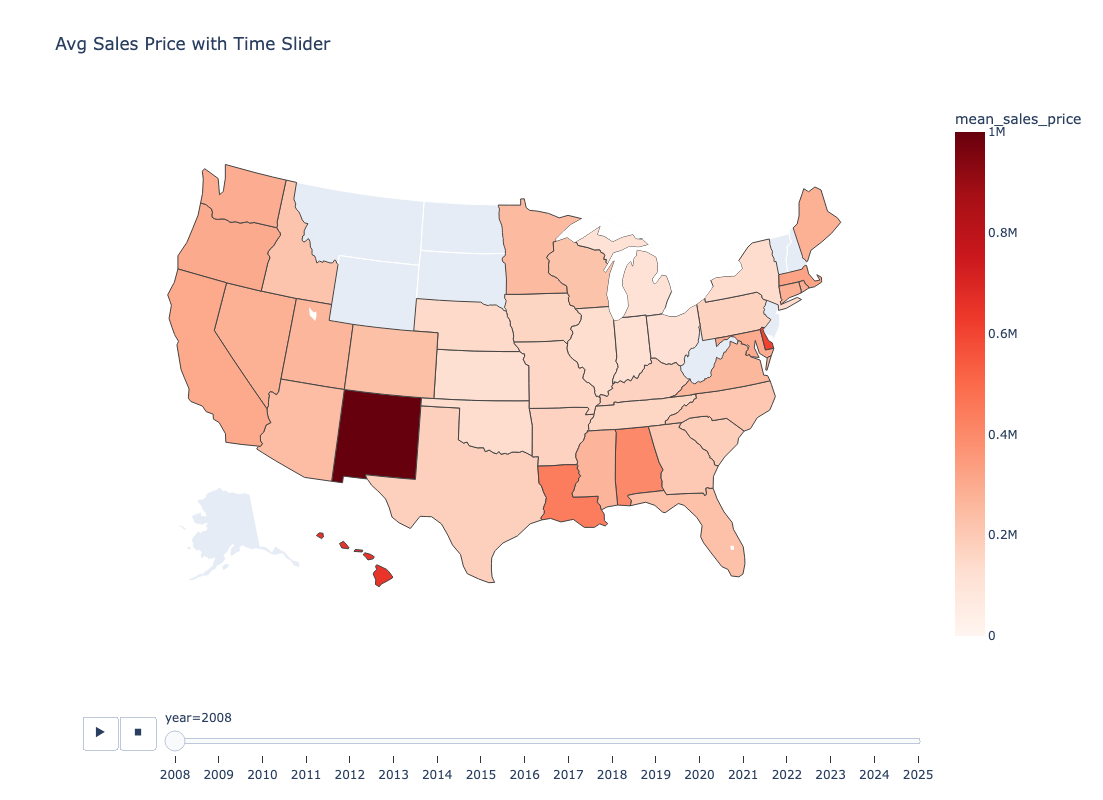

In [44]:
#create map with state data for mean sales
fig = px.choropleth(state_medians, 
                    locations='state', 
                    locationmode='USA-states', 
                    color='mean_sales_price', 
                    color_continuous_scale='reds',
                    range_color=(0, 1000000),
                    animation_frame='year', 
                    scope='usa',
                    title='Avg Sales Price with Time Slider',
                   width=1000,
                   height=800)
fig.show()

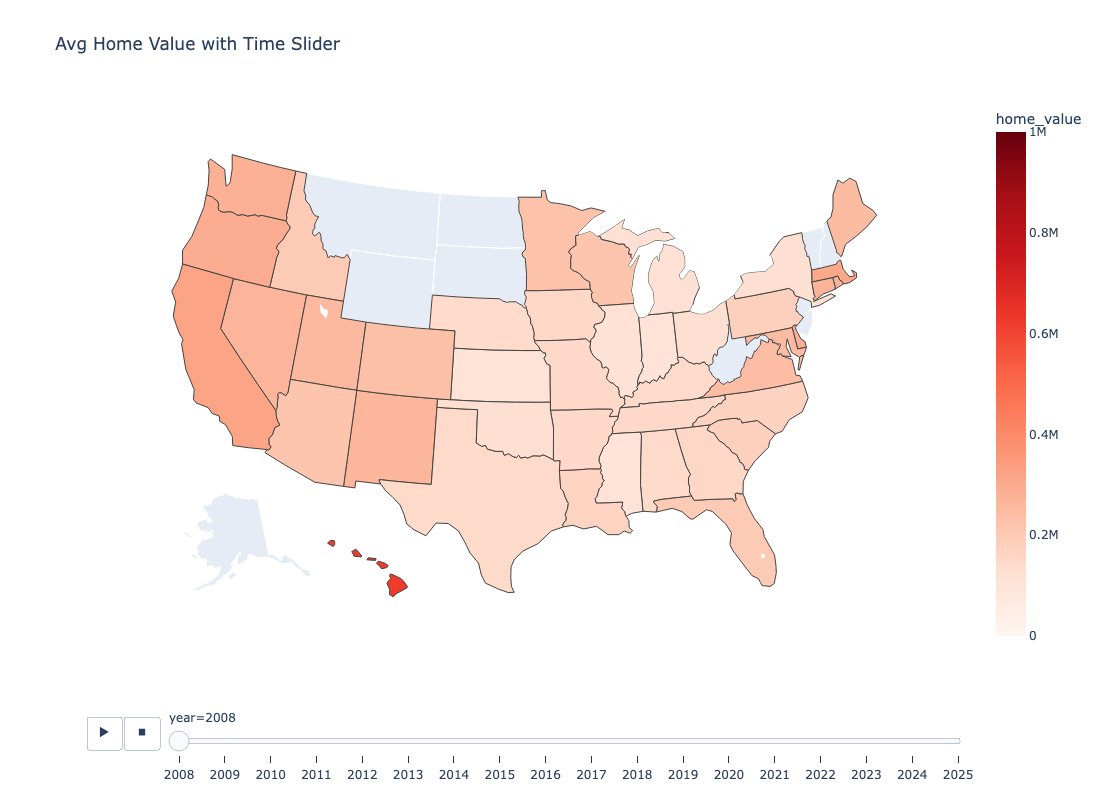

In [45]:
fig = px.choropleth(state_medians, 
                    locations='state', 
                    locationmode='USA-states', 
                    color='home_value', 
                    color_continuous_scale='reds',
                    range_color=(0, 1000000),
                    animation_frame='year', 
                    scope='usa',
                    title='Avg Home Value with Time Slider',
                   width=1000,
                   height=800)
fig.show()

In [46]:
fig = px.choropleth(state_medians, 
                    locations='state', 
                    locationmode='USA-states', 
                    color='value_surplus', 
                    color_continuous_scale='rdbu_r',
                    color_continuous_midpoint=0,
                    range_color=(-200000, 200000),
                    animation_frame='year', 
                    scope='usa',
                    title='Price over value with Time Slider',
                   width=1000,
                   height=800)
fig.show()

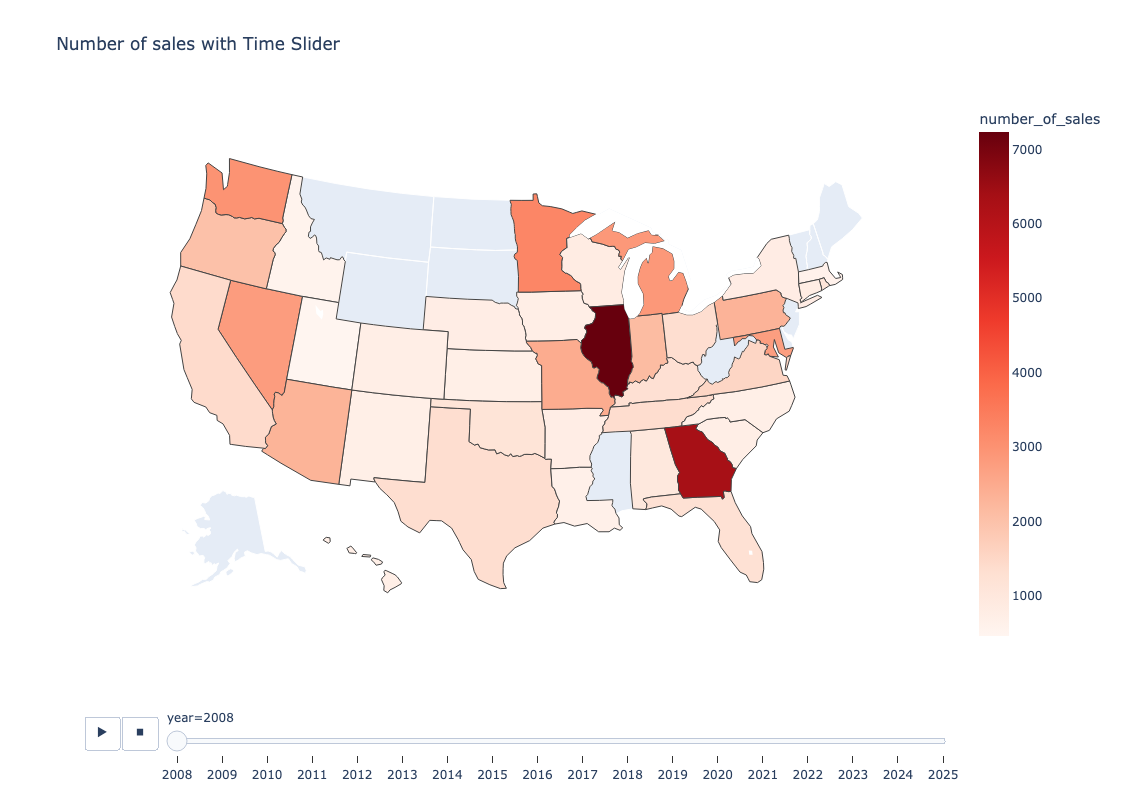

In [47]:
fig = px.choropleth(state_medians, 
                    locations='state', 
                    locationmode='USA-states', 
                    color='number_of_sales', 
                    color_continuous_scale='reds',
                    animation_frame='year', 
                    scope='usa',
                    title='Number of sales with Time Slider',
                   width=1000,
                   height=800)
fig.show()